## **pred_in**

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [ ]:
import pandas as pd
nehu = pd.read_csv('/content/gdrive/MyDrive/data/irent_1st_project/export_neihu.csv')

In [ ]:
nehu.shape

(348750, 33)

In [ ]:
pd.set_option('display.max_columns',None) # 顯示全部行資料
nehu.head(1)

,TIME_SNO,SNO,La,Lo,date,year,month,day,time_range,weekday,ISHoliday,cityName,townname,temp,wet,windspeed,rain,in,out,stay,need,OI_diff,remain,LAST_IN,LAST_OUT,LAST_STAY,LAST_OI_DIFF,LAST_remain,avg4w_in,avg4w_Out,avg4w_stay,avg4w_OI_diff,avg4w_remain
0,5,12029,25.055,121.576,2022-01-03,2022,1,3,2,1,0,臺北市,內湖區,18.730435,81.147449,2.008471,0.076923,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.2,0.0,0.2


In [ ]:
nehu_stad = nehu[['temp','wet','windspeed','rain','out','stay','LAST_IN', 'LAST_OUT', 'LAST_STAY','avg4w_in','avg4w_Out','avg4w_stay']]

In [ ]:
# 我測試不同的計算標準分數作法
nehu_test1 = nehu_stad
nehu_test2 = nehu_stad
nehu_test3 = nehu_stad
nehu_test4 = nehu_stad

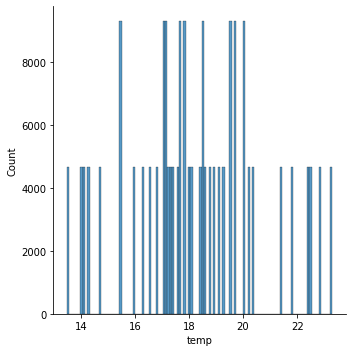

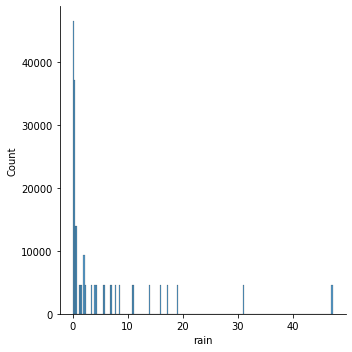

In [ ]:
# 溫度有常態分布? 這圖好奇怪
import seaborn as sns
sns.displot(nehu['temp'])
sns.displot(nehu['rain'])

In [ ]:
nehu[['temp','wet','windspeed','rain','out','stay','LAST_IN', 'LAST_OUT', 'LAST_STAY','avg4w_in','avg4w_Out','avg4w_stay']] = (nehu_stad-nehu_stad.mean())/nehu_stad.std()
# 標準分數=数据减去平均数除以标准差
# 將幾個特徵做標準分數處理，將其標準化及正規化

In [ ]:
nehu.head(1)

,TIME_SNO,SNO,La,Lo,date,year,month,day,time_range,weekday,ISHoliday,cityName,townname,temp,wet,windspeed,rain,in,out,stay,need,OI_diff,remain,LAST_IN,LAST_OUT,LAST_STAY,LAST_OI_DIFF,LAST_remain,avg4w_in,avg4w_Out,avg4w_stay,avg4w_OI_diff,avg4w_remain
0,5,12029,25.055,121.576,2022-01-03,2022,1,3,2,1,0,臺北市,內湖區,0.224309,-0.482104,-0.249997,-0.561124,0.0,-0.162851,-0.190195,0.0,0.0,0.0,-0.161823,-0.166301,0.815058,0.0,1.0,-0.302616,-0.308419,0.057521,0.0,0.2


In [ ]:
# 這也可以做標準分數處理，但回傳array還要另外處理
# from sklearn import preprocessing
# nehu_test1 = preprocessing.scale(nehu_test1, axis=0, with_mean=True, with_std=True, copy=True) # Data 為原始資料
# nehu_test1 = pd.DataFrame(nehu_test1)
# nehu_test1

In [ ]:
# 最小值最大值正規化，也是常見的標準化及正規化方法，但僅將資料等比例縮放進[0,1]區間中，但並不會改變原本的分佈情況
# from sklearn import preprocessing
# Min_Max_Scaler = preprocessing.MinMaxScaler(feature_range=(0,1)) # 設定縮放的區間上下限
# MinMax_Data = Min_Max_Scaler.fit_transform(nehu_test2) # Data 為原始資料
# nehu_test2 = pd.DataFrame(MinMax_Data)
# nehu_test2

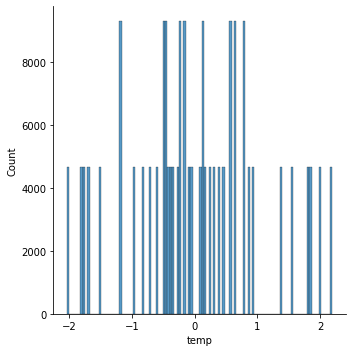

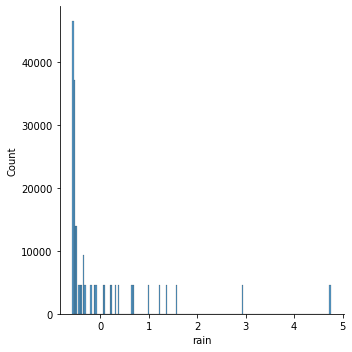

In [ ]:
import seaborn as sns
sns.displot(nehu['temp'])
sns.displot(nehu['rain'])

In [ ]:
nehu_encode = pd.get_dummies(nehu, columns=['weekday'])

In [ ]:
# 做這個有啥意義?
nehu['date'] = pd.to_datetime(nehu.date,format="%Y/%m/%d")

In [ ]:
nehu_encode.head(1)

,TIME_SNO,SNO,La,Lo,date,year,month,day,time_range,ISHoliday,cityName,townname,temp,wet,windspeed,rain,in,out,stay,need,OI_diff,remain,LAST_IN,LAST_OUT,LAST_STAY,LAST_OI_DIFF,LAST_remain,avg4w_in,avg4w_Out,avg4w_stay,avg4w_OI_diff,avg4w_remain,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weekday_7
0,5,12029,25.055,121.576,2022-01-03,2022,1,3,2,0,臺北市,內湖區,0.224309,-0.482104,-0.249997,-0.561124,0.0,-0.162851,-0.190195,0.0,0.0,0.0,-0.161823,-0.166301,0.815058,0.0,1.0,-0.302616,-0.308419,0.057521,0.0,0.2,1,0,0,0,0,0,0


In [ ]:
# 將資料依時段拆分
nehu_tr1 = nehu_encode[nehu['time_range']==1]
nehu_tr2 = nehu_encode[nehu['time_range']==2]
nehu_tr3 = nehu_encode[nehu['time_range']==3]
nehu_tr4 = nehu_encode[nehu['time_range']==4]
nehu_tr5 = nehu_encode[nehu['time_range']==5]
nehu_tr6 = nehu_encode[nehu['time_range']==6]

In [ ]:
nehu_tr1.head(1)

,TIME_SNO,SNO,La,Lo,date,year,month,day,time_range,ISHoliday,cityName,townname,temp,wet,windspeed,rain,in,out,stay,need,OI_diff,remain,LAST_IN,LAST_OUT,LAST_STAY,LAST_OI_DIFF,LAST_remain,avg4w_in,avg4w_Out,avg4w_stay,avg4w_OI_diff,avg4w_remain,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weekday_7
4,11,12029,25.055,121.576,2022-02-15,2022,2,15,1,0,臺北市,內湖區,NaN,NaN,NaN,NaN,0.0,-0.162851,-0.190195,0.0,0.0,0.0,-0.161823,-0.166301,-0.191103,0.0,0.0,-0.302616,-0.308419,-0.362719,0.0,0.0,0,1,0,0,0,0,0


In [ ]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from sklearn.model_selection import cross_val_score

In [ ]:
evaluation = pd.DataFrame({'Model':[],
               'Details':[],
               'Root Mean Squared Error (RMSE)':[],
               'R-squared (training)':[],
               'Adjusted R-squared (training)':[],
               'R-squared (test)':[],
               'Adjusted R-squared (test)':[],
               '5-Fold Cross Validation':[]})

In [ ]:
nehu_tr1.shape

(58125, 39)

In [ ]:
# time_range = 1
train_data,test_data=train_test_split(nehu_tr1,train_size=0.8,random_state=0)

In [ ]:
train_data.shape

(46500, 39)

In [ ]:
test_data.shape

(11625, 39)

In [ ]:
train_data.columns

Index(['TIME_SNO', 'SNO', 'La', 'Lo', 'date', 'year', 'month', 'day',
       'time_range', 'ISHoliday', 'cityName', 'townname', 'temp', 'wet',
       'windspeed', 'rain', 'in', 'out', 'stay', 'need', 'OI_diff', 'remain',
       'LAST_IN', 'LAST_OUT', 'LAST_STAY', 'LAST_OI_DIFF', 'LAST_remain',
       'avg4w_in', 'avg4w_Out', 'avg4w_stay', 'avg4w_OI_diff', 'avg4w_remain',
       'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5',
       'weekday_6', 'weekday_7'],
      dtype='object')

In [ ]:
features = ['temp','wet','windspeed','rain','out','stay','LAST_IN', 'LAST_OUT', 'LAST_STAY','avg4w_in','avg4w_Out','avg4w_stay','weekday_1', 'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5',
       'weekday_6', 'weekday_7']

In [ ]:
# 好多NaN
train_data[features].head()

,temp,wet,windspeed,rain,out,stay,LAST_IN,LAST_OUT,LAST_STAY,avg4w_in,avg4w_Out,avg4w_stay,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weekday_7
218894,0.642370,1.025175,-0.568361,1.563201,-0.162851,-0.190195,-0.161823,-0.166301,-0.191103,-0.302616,-0.308419,-0.187619,0,0,0,0,0,0,1
225245,-1.185186,-2.203735,-0.038010,-0.561124,-0.162851,0.833499,-0.161823,-0.166301,-0.191103,-0.104852,-0.105781,0.104214,0,0,0,0,1,0,0
239371,NaN,NaN,NaN,NaN,-0.162851,-0.190195,-0.161823,-0.166301,-0.191103,-0.302616,-0.308419,-0.362719,1,0,0,0,0,0,0
2030,NaN,NaN,NaN,NaN,-0.162851,-0.190195,-0.161823,-0.166301,-0.191103,-0.302616,-0.308419,-0.362719,0,0,0,0,1,0,0
117858,-0.478708,0.652936,-0.710936,-0.396324,-0.162851,-0.190195,-0.161823,-0.166301,-0.191103,-0.140809,0.023171,-0.267210,0,1,0,0,0,0,0


In [ ]:
# 有這麼多NaN
train_data[features][train_data[features]['temp'].isna()]

,temp,wet,windspeed,rain,out,stay,LAST_IN,LAST_OUT,LAST_STAY,avg4w_in,avg4w_Out,avg4w_stay,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weekday_7
239371,NaN,NaN,NaN,NaN,-0.162851,-0.190195,-0.161823,-0.166301,-0.191103,-0.302616,-0.308419,-0.362719,1,0,0,0,0,0,0
2030,NaN,NaN,NaN,NaN,-0.162851,-0.190195,-0.161823,-0.166301,-0.191103,-0.302616,-0.308419,-0.362719,0,0,0,0,1,0,0
241373,NaN,NaN,NaN,NaN,-0.162851,-0.190195,-0.161823,-0.166301,-0.191103,-0.302616,-0.308419,-0.362719,0,0,0,0,0,1,0
299475,NaN,NaN,NaN,NaN,-0.162851,-0.190195,-0.161823,-0.166301,-0.191103,-0.302616,-0.308419,-0.362719,0,0,0,0,0,0,1
40319,NaN,NaN,NaN,NaN,-0.162851,-0.190195,-0.161823,-0.166301,-0.191103,-0.302616,-0.308419,-0.362719,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193455,NaN,NaN,NaN,NaN,-0.162851,-0.190195,-0.161823,-0.166301,-0.191103,-0.302616,-0.308419,-0.362719,0,0,0,0,0,1,0
276061,NaN,NaN,NaN,NaN,-0.162851,-0.190195,-0.161823,-0.166301,-0.191103,-0.302616,-0.308419,-0.362719,0,1,0,0,0,0,0
256402,NaN,NaN,NaN,NaN,-0.162851,-0.190195,-0.161823,-0.166301,-0.191103,-0.005970,-0.004461,0.162581,0,0,0,0,0,0,1
262380,NaN,NaN,NaN,NaN,-0.162851,-0.190195,-0.161823,-0.166301,-0.191103,-0.302616,-0.308419,-0.362719,0,0,0,0,0,1,0


In [ ]:
train_data = train_data.drop(index=list(train_data[train_data['temp'].isna()==True].index))

In [ ]:
train_data[features].shape

(29185, 19)

In [ ]:
complex_model_1 = linear_model.LinearRegression()
complex_model_1.fit(train_data[features],train_data['in'])

print('Intercept: {}'.format(complex_model_1.intercept_))#與y軸的截距值
print('Coefficients: {}'.format(complex_model_1.coef_))#模型的係數

Intercept: 0.04750149353423561
Coefficients: [-1.25014390e-03  1.97952325e-03 -8.62867224e-04 -2.09028056e-03
  2.30627449e-01  1.96148149e-02 -1.17215167e-02  7.97360604e-03
 -1.17793650e-03  1.86772352e-01 -1.46385107e-01 -1.09073452e-02
 -8.17586321e-04 -1.19641271e-03  1.40363825e-03  8.14145820e-04
  5.03392067e-04  2.30069835e-04 -9.37246940e-04]


In [ ]:
# 刪空值再預測
test_data = test_data.drop(index=list(test_data[test_data['temp'].isna()==True].index))
pred = complex_model_1.predict(test_data[features])#拿訓練好的模型預測數據

In [ ]:
pred

array([ 0.00241653,  0.20804631, -0.00247046, ...,  0.00172913,
        0.00172913,  0.00166199])

In [ ]:
rtrcm = float(format(complex_model_1.score(train_data[features],train_data['in']),'.3f'))#計算準確度
rtrcm

0.759

In [ ]:
rtecm = float(format(complex_model_1.score(test_data[features],test_data['in']),'.3f'))
rtecm

0.696

In [ ]:
rmsecm = float(format(np.sqrt(metrics.mean_squared_error(test_data['in'],pred)),'.3f'))
rmsecm

0.143

In [ ]:
#定義adjustedR2的算法，就是R square的進化?
def adjustedR2(r2,n,k):
    return r2-(k-1)/(n-k)*(1-r2)

In [ ]:
artrcm = float(format(adjustedR2(complex_model_1.score(train_data[features],train_data['in']),train_data.shape[0],len(features)),'.3f'))
artecm = float(format(adjustedR2(complex_model_1.score(test_data[features],test_data['in']),test_data.shape[0],len(features)),'.3f'))
print(artrcm)
print(artecm)

0.759
0.695


In [ ]:
# 刪空值再預測
nehu_tr1 = nehu_tr1.drop(index=list(nehu_tr1[nehu_tr1['temp'].isna()==True].index))
# cross_val_score交叉驗證參數:模型、輸入、答案、分成5組
cv = float(format(cross_val_score(complex_model_1,nehu_tr1[features],nehu_tr1['in'],cv=5).mean(),'.3f'))
cv

0.699

In [ ]:
r = evaluation.shape[0]
evaluation.loc[r] = ['Multiple Regression-1','nehu_tr1',rmsecm,rtrcm,artrcm,rtecm,artecm,cv]
evaluation.sort_values(by = '5-Fold Cross Validation', ascending=False)

,Model,Details,Root Mean Squared Error (RMSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test),5-Fold Cross Validation
0,Multiple Regression-1,nehu_tr1,0.143,0.759,0.759,0.696,0.695,0.699


In [ ]:
# time_range = 2
train_data,test_data = train_test_split(nehu_tr2,train_size = 0.8,random_state=0)

features = ['temp','wet','windspeed','rain','out','stay','LAST_IN', 'LAST_OUT', 'LAST_STAY','avg4w_in','avg4w_Out','avg4w_stay','weekday_1', 'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5',
       'weekday_6', 'weekday_7']
complex_model_1 = linear_model.LinearRegression()
complex_model_1.fit(train_data[features],train_data['in'])

print('Intercept: {}'.format(complex_model_1.intercept_))
print('Coefficients: {}'.format(complex_model_1.coef_))

pred = complex_model_1.predict(test_data[features])
rmsecm = float(format(np.sqrt(metrics.mean_squared_error(test_data['in'],pred)),'.3f'))
rtrcm = float(format(complex_model_1.score(train_data[features],train_data['in']),'.3f'))
artrcm = float(format(adjustedR2(complex_model_1.score(train_data[features],train_data['in']),train_data.shape[0],len(features)),'.3f'))
rtecm = float(format(complex_model_1.score(test_data[features],test_data['in']),'.3f'))
artecm = float(format(adjustedR2(complex_model_1.score(test_data[features],test_data['in']),test_data.shape[0],len(features)),'.3f'))
cv = float(format(cross_val_score(complex_model_1,nehu_tr2[features],nehu_tr2['in'],cv=5).mean(),'.3f'))

r = evaluation.shape[0]
evaluation.loc[r] = ['Multiple Regression-1','nehu_tr2',rmsecm,rtrcm,artrcm,rtecm,artecm,cv]
evaluation.sort_values(by = '5-Fold Cross Validation', ascending=False)


# time_range = 3
train_data,test_data = train_test_split(nehu_tr3,train_size = 0.8,random_state=0)

features = ['temp','wet','windspeed','rain','out','stay','LAST_IN', 'LAST_OUT', 'LAST_STAY','avg4w_in','avg4w_Out','avg4w_stay','weekday_1', 'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5',
       'weekday_6', 'weekday_7']
complex_model_1 = linear_model.LinearRegression()
complex_model_1.fit(train_data[features],train_data['in'])

print('Intercept: {}'.format(complex_model_1.intercept_))
print('Coefficients: {}'.format(complex_model_1.coef_))

pred = complex_model_1.predict(test_data[features])
rmsecm = float(format(np.sqrt(metrics.mean_squared_error(test_data['in'],pred)),'.3f'))
rtrcm = float(format(complex_model_1.score(train_data[features],train_data['in']),'.3f'))
artrcm = float(format(adjustedR2(complex_model_1.score(train_data[features],train_data['in']),train_data.shape[0],len(features)),'.3f'))
rtecm = float(format(complex_model_1.score(test_data[features],test_data['in']),'.3f'))
artecm = float(format(adjustedR2(complex_model_1.score(test_data[features],test_data['in']),test_data.shape[0],len(features)),'.3f'))
cv = float(format(cross_val_score(complex_model_1,nehu_tr3[features],nehu_tr3['in'],cv=5).mean(),'.3f'))

r = evaluation.shape[0]
evaluation.loc[r] = ['Multiple Regression-1','nehu_tr3',rmsecm,rtrcm,artrcm,rtecm,artecm,cv]
evaluation.sort_values(by = '5-Fold Cross Validation', ascending=False)

# time_range = 4
train_data,test_data = train_test_split(nehu_tr4,train_size = 0.8,random_state=0)

features = ['temp','wet','windspeed','rain','out','stay','LAST_IN', 'LAST_OUT', 'LAST_STAY','avg4w_in','avg4w_Out','avg4w_stay','weekday_1', 'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5',
       'weekday_6', 'weekday_7']
complex_model_1 = linear_model.LinearRegression()
complex_model_1.fit(train_data[features],train_data['in'])

print('Intercept: {}'.format(complex_model_1.intercept_))
print('Coefficients: {}'.format(complex_model_1.coef_))

pred = complex_model_1.predict(test_data[features])
rmsecm = float(format(np.sqrt(metrics.mean_squared_error(test_data['in'],pred)),'.3f'))
rtrcm = float(format(complex_model_1.score(train_data[features],train_data['in']),'.3f'))
artrcm = float(format(adjustedR2(complex_model_1.score(train_data[features],train_data['in']),train_data.shape[0],len(features)),'.3f'))
rtecm = float(format(complex_model_1.score(test_data[features],test_data['in']),'.3f'))
artecm = float(format(adjustedR2(complex_model_1.score(test_data[features],test_data['in']),test_data.shape[0],len(features)),'.3f'))
cv = float(format(cross_val_score(complex_model_1,nehu_tr4[features],nehu_tr4['in'],cv=5).mean(),'.3f'))

r = evaluation.shape[0]
evaluation.loc[r] = ['Multiple Regression-1','nehu_tr4',rmsecm,rtrcm,artrcm,rtecm,artecm,cv]
evaluation.sort_values(by = '5-Fold Cross Validation', ascending=False)

# time_range = 5
train_data,test_data = train_test_split(nehu_tr5,train_size = 0.8,random_state=0)

features = ['temp','wet','windspeed','rain','out','stay','LAST_IN', 'LAST_OUT', 'LAST_STAY','avg4w_in','avg4w_Out','avg4w_stay','weekday_1', 'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5',
       'weekday_6', 'weekday_7']
complex_model_1 = linear_model.LinearRegression()
complex_model_1.fit(train_data[features],train_data['in'])

print('Intercept: {}'.format(complex_model_1.intercept_))
print('Coefficients: {}'.format(complex_model_1.coef_))

pred = complex_model_1.predict(test_data[features])
rmsecm = float(format(np.sqrt(metrics.mean_squared_error(test_data['in'],pred)),'.3f'))
rtrcm = float(format(complex_model_1.score(train_data[features],train_data['in']),'.3f'))
artrcm = float(format(adjustedR2(complex_model_1.score(train_data[features],train_data['in']),train_data.shape[0],len(features)),'.3f'))
rtecm = float(format(complex_model_1.score(test_data[features],test_data['in']),'.3f'))
artecm = float(format(adjustedR2(complex_model_1.score(test_data[features],test_data['in']),test_data.shape[0],len(features)),'.3f'))
cv = float(format(cross_val_score(complex_model_1,nehu_tr5[features],nehu_tr5['in'],cv=5).mean(),'.3f'))

r = evaluation.shape[0]
evaluation.loc[r] = ['Multiple Regression-1','nehu_tr5',rmsecm,rtrcm,artrcm,rtecm,artecm,cv]
evaluation.sort_values(by = '5-Fold Cross Validation', ascending=False)

# time_range = 6
train_data,test_data = train_test_split(nehu_tr6,train_size = 0.8,random_state=0)

features = ['temp','wet','windspeed','rain','out','stay','LAST_IN', 'LAST_OUT', 'LAST_STAY','avg4w_in','avg4w_Out','avg4w_stay','weekday_1', 'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5',
       'weekday_6', 'weekday_7']
complex_model_1 = linear_model.LinearRegression()
complex_model_1.fit(train_data[features],train_data['in'])

print('Intercept: {}'.format(complex_model_1.intercept_))
print('Coefficients: {}'.format(complex_model_1.coef_))

pred = complex_model_1.predict(test_data[features])
rmsecm = float(format(np.sqrt(metrics.mean_squared_error(test_data['in'],pred)),'.3f'))
rtrcm = float(format(complex_model_1.score(train_data[features],train_data['in']),'.3f'))
artrcm = float(format(adjustedR2(complex_model_1.score(train_data[features],train_data['in']),train_data.shape[0],len(features)),'.3f'))
rtecm = float(format(complex_model_1.score(test_data[features],test_data['in']),'.3f'))
artecm = float(format(adjustedR2(complex_model_1.score(test_data[features],test_data['in']),test_data.shape[0],len(features)),'.3f'))
cv = float(format(cross_val_score(complex_model_1,nehu_tr6[features],nehu_tr6['in'],cv=5).mean(),'.3f'))

r = evaluation.shape[0]
evaluation.loc[r] = ['Multiple Regression-1','nehu_tr6',rmsecm,rtrcm,artrcm,rtecm,artecm,cv]
evaluation.sort_values(by = '5-Fold Cross Validation', ascending=False)

Mounted at /content/gdrive
Intercept: 0.06320097480438085
Coefficients: [ 6.20894380e-03 -1.98130855e-03 -1.01479539e-02  7.59858860e-05
  2.96191232e-01  2.56734837e-02 -6.64063155e-02  5.17121446e-02
 -2.17208255e-03  3.00660948e-01 -2.43953477e-01 -9.45871593e-03
 -1.09644954e-02  1.44944687e-02  1.25946633e-02  1.26454506e-02
  8.21418480e-04 -1.54209979e-02 -1.41705078e-02]
Intercept: 0.05625814555617799
Coefficients: [ 1.82804271e-03 -1.74913217e-04 -4.03385171e-03 -1.81148367e-03
  2.71276798e-01  5.94023245e-02 -6.68571388e-02  4.99592105e-02
  3.42635105e-03  2.69698582e-01 -2.03073415e-01 -4.05884944e-02
  1.06980023e-03  3.92233399e-03 -9.28859232e-03 -2.11763950e-03
  6.83472468e-03  3.03891140e-03 -3.45953849e-03]
Intercept: 0.05833585111532149
Coefficients: [ 0.00387488 -0.00525956 -0.00639733  0.00270435  0.25939008  0.06842777
 -0.06489614  0.03959493  0.01083835  0.25771293 -0.17821273 -0.04568092
 -0.00949002  0.0111356  -0.00093709  0.00504567  0.00040155 -0.00743989

,Model,Details,Root Mean Squared Error (RMSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test),5-Fold Cross Validation
4,Multiple Regression-1,nehu_tr5,0.192,0.769,0.769,0.743,0.742,0.749
0,Multiple Regression-1,nehu_tr1,0.158,0.762,0.761,0.852,0.852,0.715
2,Multiple Regression-1,nehu_tr3,0.176,0.778,0.778,0.605,0.603,0.695
1,Multiple Regression-1,nehu_tr2,0.160,0.714,0.714,0.528,0.526,0.673
3,Multiple Regression-1,nehu_tr4,0.182,0.697,0.696,0.525,0.522,0.619
5,Multiple Regression-1,nehu_tr6,0.198,0.668,0.667,0.142,0.138,0.585


## **pred_out**

In [ ]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from sklearn.model_selection import cross_val_score
evaluation = pd.DataFrame({'Model': [],
                           'Details':[],
                           'Root Mean Squared Error (RMSE)':[],
                           'R-squared (training)':[],
                           'Adjusted R-squared (training)':[],
                           'R-squared (test)':[],
                           'Adjusted R-squared (test)':[],
                           '5-Fold Cross Validation':[]})
def adjustedR2(r2,n,k):
    return r2-(k-1)/(n-k)*(1-r2)

# time_range = 1
train_data,test_data = train_test_split(nehu_tr1,train_size = 0.8,random_state=0)

features = ['temp','wet','windspeed','rain','in','stay','LAST_IN', 'LAST_OUT', 'LAST_STAY','avg4w_in','avg4w_Out','avg4w_stay','weekday_1', 'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5',
       'weekday_6', 'weekday_7']
complex_model_1 = linear_model.LinearRegression()
complex_model_1.fit(train_data[features],train_data['out'])

print('Intercept: {}'.format(complex_model_1.intercept_))
print('Coefficients: {}'.format(complex_model_1.coef_))

pred = complex_model_1.predict(test_data[features])
rmsecm = float(format(np.sqrt(metrics.mean_squared_error(test_data['out'],pred)),'.3f'))
rtrcm = float(format(complex_model_1.score(train_data[features],train_data['out']),'.3f'))
artrcm = float(format(adjustedR2(complex_model_1.score(train_data[features],train_data['out']),train_data.shape[0],len(features)),'.3f'))
rtecm = float(format(complex_model_1.score(test_data[features],test_data['out']),'.3f'))
artecm = float(format(adjustedR2(complex_model_1.score(test_data[features],test_data['out']),test_data.shape[0],len(features)),'.3f'))
cv = float(format(cross_val_score(complex_model_1,nehu_tr1[features],nehu_tr1['out'],cv=5).mean(),'.3f'))

r = evaluation.shape[0]
evaluation.loc[r] = ['Multiple Regression-1','nehu_tr1',rmsecm,rtrcm,artrcm,rtecm,artecm,cv]
evaluation.sort_values(by = '5-Fold Cross Validation', ascending=False)


# time_range = 2
train_data,test_data = train_test_split(nehu_tr2,train_size = 0.8,random_state=0)

features = ['temp','wet','windspeed','rain','in','stay','LAST_IN', 'LAST_OUT', 'LAST_STAY','avg4w_in','avg4w_Out','avg4w_stay','weekday_1', 'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5',
       'weekday_6', 'weekday_7']
complex_model_1 = linear_model.LinearRegression()
complex_model_1.fit(train_data[features],train_data['out'])

print('Intercept: {}'.format(complex_model_1.intercept_))
print('Coefficients: {}'.format(complex_model_1.coef_))

pred = complex_model_1.predict(test_data[features])
rmsecm = float(format(np.sqrt(metrics.mean_squared_error(test_data['out'],pred)),'.3f'))
rtrcm = float(format(complex_model_1.score(train_data[features],train_data['out']),'.3f'))
artrcm = float(format(adjustedR2(complex_model_1.score(train_data[features],train_data['out']),train_data.shape[0],len(features)),'.3f'))
rtecm = float(format(complex_model_1.score(test_data[features],test_data['out']),'.3f'))
artecm = float(format(adjustedR2(complex_model_1.score(test_data[features],test_data['out']),test_data.shape[0],len(features)),'.3f'))
cv = float(format(cross_val_score(complex_model_1,nehu_tr2[features],nehu_tr2['out'],cv=5).mean(),'.3f'))

r = evaluation.shape[0]
evaluation.loc[r] = ['Multiple Regression-1','nehu_tr2',rmsecm,rtrcm,artrcm,rtecm,artecm,cv]
evaluation.sort_values(by = '5-Fold Cross Validation', ascending=False)


# time_range = 3
train_data,test_data = train_test_split(nehu_tr3,train_size = 0.8,random_state=0)

features = ['temp','wet','windspeed','rain','in','stay','LAST_IN', 'LAST_OUT', 'LAST_STAY','avg4w_in','avg4w_Out','avg4w_stay','weekday_1', 'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5',
       'weekday_6', 'weekday_7']
complex_model_1 = linear_model.LinearRegression()
complex_model_1.fit(train_data[features],train_data['out'])

print('Intercept: {}'.format(complex_model_1.intercept_))
print('Coefficients: {}'.format(complex_model_1.coef_))

pred = complex_model_1.predict(test_data[features])
rmsecm = float(format(np.sqrt(metrics.mean_squared_error(test_data['out'],pred)),'.3f'))
rtrcm = float(format(complex_model_1.score(train_data[features],train_data['out']),'.3f'))
artrcm = float(format(adjustedR2(complex_model_1.score(train_data[features],train_data['out']),train_data.shape[0],len(features)),'.3f'))
rtecm = float(format(complex_model_1.score(test_data[features],test_data['out']),'.3f'))
artecm = float(format(adjustedR2(complex_model_1.score(test_data[features],test_data['out']),test_data.shape[0],len(features)),'.3f'))
cv = float(format(cross_val_score(complex_model_1,nehu_tr3[features],nehu_tr3['out'],cv=5).mean(),'.3f'))

r = evaluation.shape[0]
evaluation.loc[r] = ['Multiple Regression-1','nehu_tr3',rmsecm,rtrcm,artrcm,rtecm,artecm,cv]
evaluation.sort_values(by = '5-Fold Cross Validation', ascending=False)

# time_range = 4
train_data,test_data = train_test_split(nehu_tr4,train_size = 0.8,random_state=0)

features = ['temp','wet','windspeed','rain','in','stay','LAST_IN', 'LAST_OUT', 'LAST_STAY','avg4w_in','avg4w_Out','avg4w_stay','weekday_1', 'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5',
       'weekday_6', 'weekday_7']
complex_model_1 = linear_model.LinearRegression()
complex_model_1.fit(train_data[features],train_data['out'])

print('Intercept: {}'.format(complex_model_1.intercept_))
print('Coefficients: {}'.format(complex_model_1.coef_))

pred = complex_model_1.predict(test_data[features])
rmsecm = float(format(np.sqrt(metrics.mean_squared_error(test_data['out'],pred)),'.3f'))
rtrcm = float(format(complex_model_1.score(train_data[features],train_data['out']),'.3f'))
artrcm = float(format(adjustedR2(complex_model_1.score(train_data[features],train_data['out']),train_data.shape[0],len(features)),'.3f'))
rtecm = float(format(complex_model_1.score(test_data[features],test_data['out']),'.3f'))
artecm = float(format(adjustedR2(complex_model_1.score(test_data[features],test_data['out']),test_data.shape[0],len(features)),'.3f'))
cv = float(format(cross_val_score(complex_model_1,nehu_tr4[features],nehu_tr4['out'],cv=5).mean(),'.3f'))

r = evaluation.shape[0]
evaluation.loc[r] = ['Multiple Regression-1','nehu_tr4',rmsecm,rtrcm,artrcm,rtecm,artecm,cv]
evaluation.sort_values(by = '5-Fold Cross Validation', ascending=False)

# time_range = 5
train_data,test_data = train_test_split(nehu_tr5,train_size = 0.8,random_state=0)

features = ['temp','wet','windspeed','rain','in','stay','LAST_IN', 'LAST_OUT', 'LAST_STAY','avg4w_in','avg4w_Out','avg4w_stay','weekday_1', 'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5',
       'weekday_6', 'weekday_7']
complex_model_1 = linear_model.LinearRegression()
complex_model_1.fit(train_data[features],train_data['out'])

print('Intercept: {}'.format(complex_model_1.intercept_))
print('Coefficients: {}'.format(complex_model_1.coef_))

pred = complex_model_1.predict(test_data[features])
rmsecm = float(format(np.sqrt(metrics.mean_squared_error(test_data['out'],pred)),'.3f'))
rtrcm = float(format(complex_model_1.score(train_data[features],train_data['out']),'.3f'))
artrcm = float(format(adjustedR2(complex_model_1.score(train_data[features],train_data['out']),train_data.shape[0],len(features)),'.3f'))
rtecm = float(format(complex_model_1.score(test_data[features],test_data['out']),'.3f'))
artecm = float(format(adjustedR2(complex_model_1.score(test_data[features],test_data['out']),test_data.shape[0],len(features)),'.3f'))
cv = float(format(cross_val_score(complex_model_1,nehu_tr5[features],nehu_tr5['out'],cv=5).mean(),'.3f'))

r = evaluation.shape[0]
evaluation.loc[r] = ['Multiple Regression-1','nehu_tr5',rmsecm,rtrcm,artrcm,rtecm,artecm,cv]
evaluation.sort_values(by = '5-Fold Cross Validation', ascending=False)

# time_range = 6
train_data,test_data = train_test_split(nehu_tr6,train_size = 0.8,random_state=0)

features = ['temp','wet','windspeed','rain','in','stay','LAST_IN', 'LAST_OUT', 'LAST_STAY','avg4w_in','avg4w_Out','avg4w_stay','weekday_1', 'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5',
       'weekday_6', 'weekday_7']
complex_model_1 = linear_model.LinearRegression()
complex_model_1.fit(train_data[features],train_data['out'])

print('Intercept: {}'.format(complex_model_1.intercept_))
print('Coefficients: {}'.format(complex_model_1.coef_))

pred = complex_model_1.predict(test_data[features])
rmsecm = float(format(np.sqrt(metrics.mean_squared_error(test_data['out'],pred)),'.3f'))
rtrcm = float(format(complex_model_1.score(train_data[features],train_data['out']),'.3f'))
artrcm = float(format(adjustedR2(complex_model_1.score(train_data[features],train_data['out']),train_data.shape[0],len(features)),'.3f'))
rtecm = float(format(complex_model_1.score(test_data[features],test_data['out']),'.3f'))
artecm = float(format(adjustedR2(complex_model_1.score(test_data[features],test_data['out']),test_data.shape[0],len(features)),'.3f'))
cv = float(format(cross_val_score(complex_model_1,nehu_tr6[features],nehu_tr6['out'],cv=5).mean(),'.3f'))

r = evaluation.shape[0]
evaluation.loc[r] = ['Multiple Regression-1','nehu_tr6',rmsecm,rtrcm,artrcm,rtecm,artecm,cv]
evaluation.sort_values(by = '5-Fold Cross Validation', ascending=False)

Intercept: -0.11622204458190531
Coefficients: [-1.64100033e-02  1.06780245e-02  3.98940647e-03 -1.48334685e-03
  1.88384238e+00  1.71706167e-01  1.40503364e-01 -1.60542452e-01
  3.43933698e-02 -6.00851522e-01  7.49392819e-01 -1.06426991e-01
  2.22725278e-02 -1.08109320e-02 -3.06304886e-02 -1.90284736e-02
 -3.57137613e-03  2.62919086e-02  1.54768339e-02]
Intercept: -0.09646615629841031
Coefficients: [-1.10031895e-02  4.31969290e-03 -8.68034072e-03  7.02001814e-03
  1.72813987e+00  1.55380319e-01  1.20577436e-01 -1.78314325e-01
  1.94091245e-02 -4.63553205e-01  7.00355555e-01 -9.62016504e-02
  1.27446238e-03  1.95723760e-02  5.13717094e-03  7.10205975e-03
 -2.14336016e-02 -1.11343694e-02 -5.18098131e-04]
Intercept: -0.10246260174092184
Coefficients: [-7.36493711e-03  7.07036257e-03  1.18905621e-03 -8.72033220e-03
  1.86223406e+00  1.05492449e-01  9.79095785e-02 -1.59834350e-01
  1.37924520e-02 -4.35632633e-01  6.66635632e-01 -6.33472284e-02
  2.66027616e-02 -2.86520115e-03 -9.24949853e-0

,Model,Details,Root Mean Squared Error (RMSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test),5-Fold Cross Validation
4,Multiple Regression-1,nehu_tr5,0.546,0.770,0.770,0.757,0.756,0.755
0,Multiple Regression-1,nehu_tr1,0.322,0.775,0.774,0.881,0.880,0.734
1,Multiple Regression-1,nehu_tr2,0.395,0.721,0.721,0.687,0.685,0.681
2,Multiple Regression-1,nehu_tr3,0.553,0.751,0.751,0.653,0.651,0.649
3,Multiple Regression-1,nehu_tr4,0.641,0.700,0.700,0.618,0.617,0.590
5,Multiple Regression-1,nehu_tr6,0.478,0.651,0.651,0.464,0.461,0.589


## **pred_stay**

In [ ]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from sklearn.model_selection import cross_val_score
evaluation = pd.DataFrame({'Model': [],
                           'Details':[],
                           'Root Mean Squared Error (RMSE)':[],
                           'R-squared (training)':[],
                           'Adjusted R-squared (training)':[],
                           'R-squared (test)':[],
                           'Adjusted R-squared (test)':[],
                           '5-Fold Cross Validation':[]})
def adjustedR2(r2,n,k):
    return r2-(k-1)/(n-k)*(1-r2)

# time_range = 1
train_data,test_data = train_test_split(nehu_tr1,train_size = 0.8,random_state=0)

features = ['temp','wet','windspeed','rain','in','out','LAST_IN', 'LAST_OUT', 'LAST_STAY','avg4w_in','avg4w_Out','avg4w_stay','weekday_1', 'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5',
       'weekday_6', 'weekday_7']
complex_model_1 = linear_model.LinearRegression()
complex_model_1.fit(train_data[features],train_data['stay'])

print('Intercept: {}'.format(complex_model_1.intercept_))
print('Coefficients: {}'.format(complex_model_1.coef_))

pred = complex_model_1.predict(test_data[features])
rmsecm = float(format(np.sqrt(metrics.mean_squared_error(test_data['stay'],pred)),'.3f'))
rtrcm = float(format(complex_model_1.score(train_data[features],train_data['stay']),'.3f'))
artrcm = float(format(adjustedR2(complex_model_1.score(train_data[features],train_data['stay']),train_data.shape[0],len(features)),'.3f'))
rtecm = float(format(complex_model_1.score(test_data[features],test_data['stay']),'.3f'))
artecm = float(format(adjustedR2(complex_model_1.score(test_data[features],test_data['stay']),test_data.shape[0],len(features)),'.3f'))
cv = float(format(cross_val_score(complex_model_1,nehu_tr1[features],nehu_tr1['stay'],cv=5).mean(),'.3f'))

r = evaluation.shape[0]
evaluation.loc[r] = ['Multiple Regression-1','nehu_tr1',rmsecm,rtrcm,artrcm,rtecm,artecm,cv]
evaluation.sort_values(by = '5-Fold Cross Validation', ascending=False)


# time_range = 2
train_data,test_data = train_test_split(nehu_tr2,train_size = 0.8,random_state=0)

features = ['temp','wet','windspeed','rain','in','out','LAST_IN', 'LAST_OUT', 'LAST_STAY','avg4w_in','avg4w_Out','avg4w_stay','weekday_1', 'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5',
       'weekday_6', 'weekday_7']
complex_model_1 = linear_model.LinearRegression()
complex_model_1.fit(train_data[features],train_data['stay'])

print('Intercept: {}'.format(complex_model_1.intercept_))
print('Coefficients: {}'.format(complex_model_1.coef_))

pred = complex_model_1.predict(test_data[features])
rmsecm = float(format(np.sqrt(metrics.mean_squared_error(test_data['stay'],pred)),'.3f'))
rtrcm = float(format(complex_model_1.score(train_data[features],train_data['stay']),'.3f'))
artrcm = float(format(adjustedR2(complex_model_1.score(train_data[features],train_data['stay']),train_data.shape[0],len(features)),'.3f'))
rtecm = float(format(complex_model_1.score(test_data[features],test_data['stay']),'.3f'))
artecm = float(format(adjustedR2(complex_model_1.score(test_data[features],test_data['stay']),test_data.shape[0],len(features)),'.3f'))
cv = float(format(cross_val_score(complex_model_1,nehu_tr2[features],nehu_tr2['stay'],cv=5).mean(),'.3f'))

r = evaluation.shape[0]
evaluation.loc[r] = ['Multiple Regression-1','nehu_tr2',rmsecm,rtrcm,artrcm,rtecm,artecm,cv]
evaluation.sort_values(by = '5-Fold Cross Validation', ascending=False)


# time_range = 3
train_data,test_data = train_test_split(nehu_tr3,train_size = 0.8,random_state=0)

features = ['temp','wet','windspeed','rain','in','out','LAST_IN', 'LAST_OUT', 'LAST_STAY','avg4w_in','avg4w_Out','avg4w_stay','weekday_1', 'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5',
       'weekday_6', 'weekday_7']
complex_model_1 = linear_model.LinearRegression()
complex_model_1.fit(train_data[features],train_data['stay'])

print('Intercept: {}'.format(complex_model_1.intercept_))
print('Coefficients: {}'.format(complex_model_1.coef_))

pred = complex_model_1.predict(test_data[features])
rmsecm = float(format(np.sqrt(metrics.mean_squared_error(test_data['stay'],pred)),'.3f'))
rtrcm = float(format(complex_model_1.score(train_data[features],train_data['stay']),'.3f'))
artrcm = float(format(adjustedR2(complex_model_1.score(train_data[features],train_data['stay']),train_data.shape[0],len(features)),'.3f'))
rtecm = float(format(complex_model_1.score(test_data[features],test_data['stay']),'.3f'))
artecm = float(format(adjustedR2(complex_model_1.score(test_data[features],test_data['stay']),test_data.shape[0],len(features)),'.3f'))
cv = float(format(cross_val_score(complex_model_1,nehu_tr3[features],nehu_tr3['stay'],cv=5).mean(),'.3f'))

r = evaluation.shape[0]
evaluation.loc[r] = ['Multiple Regression-1','nehu_tr3',rmsecm,rtrcm,artrcm,rtecm,artecm,cv]
evaluation.sort_values(by = '5-Fold Cross Validation', ascending=False)

# time_range = 4
train_data,test_data = train_test_split(nehu_tr4,train_size = 0.8,random_state=0)

features = ['temp','wet','windspeed','rain','in','out','LAST_IN', 'LAST_OUT', 'LAST_STAY','avg4w_in','avg4w_Out','avg4w_stay','weekday_1', 'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5',
       'weekday_6', 'weekday_7']
complex_model_1 = linear_model.LinearRegression()
complex_model_1.fit(train_data[features],train_data['stay'])

print('Intercept: {}'.format(complex_model_1.intercept_))
print('Coefficients: {}'.format(complex_model_1.coef_))

pred = complex_model_1.predict(test_data[features])
rmsecm = float(format(np.sqrt(metrics.mean_squared_error(test_data['stay'],pred)),'.3f'))
rtrcm = float(format(complex_model_1.score(train_data[features],train_data['stay']),'.3f'))
artrcm = float(format(adjustedR2(complex_model_1.score(train_data[features],train_data['stay']),train_data.shape[0],len(features)),'.3f'))
rtecm = float(format(complex_model_1.score(test_data[features],test_data['stay']),'.3f'))
artecm = float(format(adjustedR2(complex_model_1.score(test_data[features],test_data['stay']),test_data.shape[0],len(features)),'.3f'))
cv = float(format(cross_val_score(complex_model_1,nehu_tr4[features],nehu_tr4['stay'],cv=5).mean(),'.3f'))

r = evaluation.shape[0]
evaluation.loc[r] = ['Multiple Regression-1','nehu_tr4',rmsecm,rtrcm,artrcm,rtecm,artecm,cv]
evaluation.sort_values(by = '5-Fold Cross Validation', ascending=False)

# time_range = 5
train_data,test_data = train_test_split(nehu_tr5,train_size = 0.8,random_state=0)

features = ['temp','wet','windspeed','rain','in','out','LAST_IN', 'LAST_OUT', 'LAST_STAY','avg4w_in','avg4w_Out','avg4w_stay','weekday_1', 'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5',
       'weekday_6', 'weekday_7']
complex_model_1 = linear_model.LinearRegression()
complex_model_1.fit(train_data[features],train_data['stay'])

print('Intercept: {}'.format(complex_model_1.intercept_))
print('Coefficients: {}'.format(complex_model_1.coef_))

pred = complex_model_1.predict(test_data[features])
rmsecm = float(format(np.sqrt(metrics.mean_squared_error(test_data['stay'],pred)),'.3f'))
rtrcm = float(format(complex_model_1.score(train_data[features],train_data['stay']),'.3f'))
artrcm = float(format(adjustedR2(complex_model_1.score(train_data[features],train_data['stay']),train_data.shape[0],len(features)),'.3f'))
rtecm = float(format(complex_model_1.score(test_data[features],test_data['stay']),'.3f'))
artecm = float(format(adjustedR2(complex_model_1.score(test_data[features],test_data['stay']),test_data.shape[0],len(features)),'.3f'))
cv = float(format(cross_val_score(complex_model_1,nehu_tr5[features],nehu_tr5['stay'],cv=5).mean(),'.3f'))

r = evaluation.shape[0]
evaluation.loc[r] = ['Multiple Regression-1','nehu_tr5',rmsecm,rtrcm,artrcm,rtecm,artecm,cv]
evaluation.sort_values(by = '5-Fold Cross Validation', ascending=False)

# time_range = 6
train_data,test_data = train_test_split(nehu_tr6,train_size = 0.8,random_state=0)

features = ['temp','wet','windspeed','rain','in','out','LAST_IN', 'LAST_OUT', 'LAST_STAY','avg4w_in','avg4w_Out','avg4w_stay','weekday_1', 'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5',
       'weekday_6', 'weekday_7']
complex_model_1 = linear_model.LinearRegression()
complex_model_1.fit(train_data[features],train_data['stay'])

print('Intercept: {}'.format(complex_model_1.intercept_))
print('Coefficients: {}'.format(complex_model_1.coef_))

pred = complex_model_1.predict(test_data[features])
rmsecm = float(format(np.sqrt(metrics.mean_squared_error(test_data['stay'],pred)),'.3f'))
rtrcm = float(format(complex_model_1.score(train_data[features],train_data['stay']),'.3f'))
artrcm = float(format(adjustedR2(complex_model_1.score(train_data[features],train_data['stay']),train_data.shape[0],len(features)),'.3f'))
rtecm = float(format(complex_model_1.score(test_data[features],test_data['stay']),'.3f'))
artecm = float(format(adjustedR2(complex_model_1.score(test_data[features],test_data['stay']),test_data.shape[0],len(features)),'.3f'))
cv = float(format(cross_val_score(complex_model_1,nehu_tr6[features],nehu_tr6['stay'],cv=5).mean(),'.3f'))

r = evaluation.shape[0]
evaluation.loc[r] = ['Multiple Regression-1','nehu_tr6',rmsecm,rtrcm,artrcm,rtecm,artecm,cv]
evaluation.sort_values(by = '5-Fold Cross Validation', ascending=False)

Intercept: -0.03057935751907962
Coefficients: [-5.95301523e-03 -9.14290608e-03  4.09820854e-02 -1.26996736e-02
  3.54764996e-01  3.73052099e-01  4.05367701e-02  5.91316980e-04
 -1.09010695e-01 -8.52310448e-02 -2.00520096e-01  6.03041830e-01
  1.43197276e-02 -4.11685858e-02 -1.31273010e-02 -4.24302469e-02
  1.35943367e-03  4.63207120e-02  3.47262603e-02]
Intercept: -0.036478536934768255
Coefficients: [ 3.47307356e-03 -7.54108178e-03  1.59292681e-02 -1.06733758e-02
  6.19945599e-01  2.54553991e-01  1.74098147e-02  6.52417766e-02
 -9.11191637e-02 -1.28827354e-01 -1.87010280e-01  6.14783976e-01
  9.78788508e-03 -2.60863719e-02  1.02455861e-02 -1.68458970e-02
 -2.54080185e-05  1.83453945e-02  4.57881119e-03]
Intercept: -0.07519429635322201
Coefficients: [ 0.01135855 -0.00582076  0.01384995 -0.00779723  1.10380017  0.23702741
  0.13700626  0.02981043 -0.12757444 -0.33641137 -0.11569     0.6051344
 -0.01219516 -0.02119615  0.00457414  0.00545503  0.00547999  0.02042681
 -0.00254466]
Intercept

,Model,Details,Root Mean Squared Error (RMSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test),5-Fold Cross Validation
3,Multiple Regression-1,nehu_tr4,0.775,0.561,0.561,0.527,0.525,0.547
2,Multiple Regression-1,nehu_tr3,0.755,0.560,0.559,0.501,0.499,0.524
4,Multiple Regression-1,nehu_tr5,0.694,0.499,0.498,0.559,0.556,0.496
0,Multiple Regression-1,nehu_tr1,0.694,0.478,0.477,0.363,0.360,0.444
1,Multiple Regression-1,nehu_tr2,0.582,0.469,0.468,0.508,0.505,0.438
5,Multiple Regression-1,nehu_tr6,0.695,0.466,0.465,0.380,0.376,0.422
